## Convolutional Neural Network

En el ejercicio siguiente se va a realizar un modelo de clasificación para el dataset MNIST <https://en.wikipedia.org/wiki/MNIST_database>. Para ello, vamos a diseñar una red neuronal convolucional con 2 capas usando el framework KERAS. La red que vamos a diseñar realizará lo siguiente:

- Vamos a utilizar dos capas convolucionales con filtros de kernel de tamaño 3 (3x3)
- La función de activación será tipo RELU
- Por último, vamos a "aplastar" la salida de las capas convolucionales para conectarlo con una última capa sencilla
- Una capa sencilla de salida con los 10 números posibles

Como ya sabemos, los datos son imágenes de 28x28 píxeles y existen 10 números a clasificar, del 0 al 9. Puesto que el valor de los píxeles está en escala de grises del 0 al 255, normalizamos de 0 a 1.

In [1]:
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
X_train[0].shape

(28, 28)

In [3]:
# Mostramos una imagen
print(X_train.shape)
print(X_train[0].shape)
X_train[0]

(60000, 28, 28)
(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
# Y el número que representa
y_train[0]

5

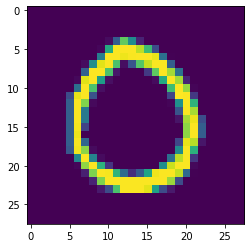

In [7]:
import matplotlib.pyplot as plt

# Dibujamos una muetra
plt.imshow(X_train[2340])

Realizamos un reshape de los datos de entrada para ajustarlos a un Tensor. Puesto que no tenemos color, la dimensión del último canal es 1

In [8]:
# reshape para un tensor
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [10]:
from tensorflow.keras.utils import to_categorical

# Realizamos un one-hot encode de la variable objetivo. Es decir, en vez de tener un valor del 0 al 9, vamos a tener 10 columnas con un 0 o un 1
print(f"Datos originales :{y_train.shape}")
y_train = to_categorical(y_train)
print(f"Datos transformados :{y_train.shape}")
y_test = to_categorical(y_test)
y_train[0]

Datos originales :(60000,)
Datos transformados :(60000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Creamos el modelo

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization

# creación del modelo
model = Sequential()

model.add(BatchNormalization(input_shape=(28,28,1)))
# Añadimos capas. En este caso 2 capas convolucionales + activación con RELU + Flatten (para pasar a 1 dimension)
model.add(Conv2D(64, kernel_size=3, activation='relu', padding="same", strides=(1,1)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Flatten())

# finalmente añadimos la última capa de tamaño 10 = al tamaño de nuestra clasificación de números y aplicamos la función softmax. 
# la función softmax hace que la suma del vector de salida sea 1, por lo que los diferentes valores representan la probabildad de cada número
model.add(Dense(10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 6, 6, 32)        

In [43]:
# Compilamos el modelo para calcular su acierto
# Utilizamos valores "por defecto" en el optimizador, el cálculo de la pérdida y la métrica
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

In [44]:
# Lo entrenamos, en este caso durante 3 iteraciones (probar modificar este número)
# Utilizamos el TRAIN para entrenar y el TEST para validar el resultado
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2102 - accuracy: 0.9347 - mse: 0.0094 - val_loss: 0.0515 - val_accuracy: 0.9824 - val_mse: 0.0027
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0420 - accuracy: 0.9872 - mse: 0.0020 - val_loss: 0.0517 - val_accuracy: 0.9843 - val_mse: 0.0024
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0296 - accuracy: 0.9905 - mse: 0.0015 - val_loss: 0.0363 - val_accuracy: 0.9880 - val_mse: 0.0018
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0216 - accuracy: 0.9934 - mse: 0.0011 - val_loss: 0.0502 - val_accuracy: 0.9846 - val_mse: 0.0025
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9948 - mse: 7.9519e-04 - val_loss: 0.0376 - val_accuracy: 0.9897 - val_mse: 0.0016


Realizamos unas cuantas predicciones y finalmente calculamos la precisión del modelo

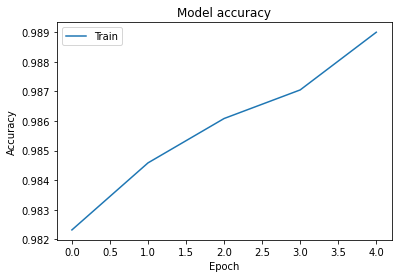

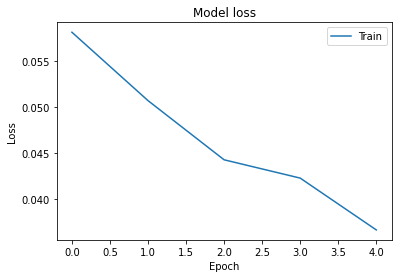

In [26]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [27]:
# Probabilidades de todos los números de las primeras 4 muestras
model.predict(X_test[:4])

array([[7.5049689e-12, 2.4734062e-10, 2.1223792e-07, 3.1284951e-06,
        4.8474783e-11, 5.2414441e-11, 1.2284023e-16, 9.9999595e-01,
        4.5571580e-10, 6.6045214e-07],
       [7.1168106e-11, 1.5856969e-10, 1.0000000e+00, 6.6731803e-14,
        1.4532497e-15, 4.7714018e-17, 4.9736916e-11, 1.6582772e-15,
        1.2160024e-10, 5.2967056e-20],
       [5.1048457e-11, 9.9999833e-01, 2.9310346e-08, 5.7438117e-12,
        3.8224348e-07, 2.9103935e-09, 2.9947731e-08, 1.4418296e-07,
        1.1102242e-06, 1.2442946e-08],
       [9.9999976e-01, 1.5342040e-17, 2.6208059e-07, 1.8522584e-14,
        1.1952508e-11, 5.1397389e-12, 2.2332729e-08, 5.7502810e-14,
        2.8845173e-09, 1.3160794e-09]], dtype=float32)

In [28]:
# Si utilizamos la función softmax en esto para ver cuáles son los valores máximos
print(f"Primer valor: {np.argmax(model.predict(X_test[:4])[0])}")
print(f"Segundo valor: {np.argmax(model.predict(X_test[:4])[1])}")
print(f"Tercer valor: {np.argmax(model.predict(X_test[:4])[2])}")
print(f"Cuarto valor: {np.argmax(model.predict(X_test[:4])[3])}")

Primer valor: 7
Segundo valor: 2
Tercer valor: 1
Cuarto valor: 0


In [29]:
# Que en este caso coincide con los primeros 4 valores que son (normal, ya que tenemos una precisión del 97%)
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
# Si quisiéramos calcular la precisión del modelo con cualquier dataset, no habría más que utilizar la expresión evaluate
# Esta nos devuelve primero la pérdida de validación y luego la precisión
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0509 - accuracy: 0.9861


[0.05087694525718689, 0.9861000180244446]

Cosas que se dejan al alumno para intentar mejorar el modelo
- Añadir una capa de normalización para trabajar con valores siempre entre 0 y 1
- Añadir una capa Fully Connected
- Añadir/Quitar una capa convolucional
- Añadir una capa de DropOut que ayude a evitar el overfitting
- Ejecutar más pasos de entrenamiento